# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [13]:
import pandas as pd 

# Cargar datos
df = pd.read_csv(r"C:\Users\JUAN\Downloads\Pruebas_ICFES_20250914.csv")

# 1. Dimensiones
print("Dimensiones del dataset (filas, columnas):", df.shape)

# 2. Columnas
print("\nColumnas:")
print(df.columns.tolist())

# 3. Tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)

# 4. Primeras filas
print("\nPrimeras filas:")
print(df.head())

# 5. Municipios e instituciones
print("\nNúmero de municipios:", df["MUNICIPIO"].nunique())
print("Lista de municipios:", df["MUNICIPIO"].unique())
print("\nNúmero de instituciones educativas:", df["INSTITUCION EDUCATIVA"].nunique())

# 6. Columnas que corresponden a años/períodos
columnas_anios = [col for col in df.columns if "AÑO" in col.upper() or "PERIODO" in col.upper()]
print("\nColumnas de años/períodos de evaluación:")
print(columnas_anios)

# 7. Valores únicos en cada año
for col in columnas_anios:
    print(f"\nValores únicos en {col}: {df[col].unique()}")

# 8. Conteo de valores 'NR' por columna
print("\nConteo de valores 'NR' por columna:")
print((df == "NR").sum())

# 9. Porcentaje de 'NR' por columna
print("\nPorcentaje de 'NR' por columna:")
print(((df == "NR").sum() / len(df)) * 100)

# 10. Porcentaje de valores faltantes reales (NaN)
print("\nPorcentaje de valores faltantes reales (NaN) por columna:")
print(df.isnull().mean() * 100)

# 11. Variables de interés (estructura de datos tipo lista)
variables_interes = ["MUNICIPIO", "INSTITUCION EDUCATIVA"] + columnas_anios
print("\nVariables seleccionadas de interés:")
print(variables_interes)


Dimensiones del dataset (filas, columnas): (63, 13)

Columnas:
['MUNICIPIO', 'INSTITUCION EDUCATIVA', 'AÑO 2014', 'AÑO 2015', 'AÑO 2016', 'AÑO 2017', 'AÑO 2018', 'AÑO 2019', 'AÑO 2020', 'AÑO 2021', 'AÑO 2022', 'AÑO 2023', 'AÑO 2024']

Tipos de datos por columna:
MUNICIPIO                object
INSTITUCION EDUCATIVA    object
AÑO 2014                 object
AÑO 2015                 object
AÑO 2016                 object
AÑO 2017                 object
AÑO 2018                 object
AÑO 2019                 object
AÑO 2020                 object
AÑO 2021                 object
AÑO 2022                 object
AÑO 2023                 object
AÑO 2024                 object
dtype: object

Primeras filas:
  MUNICIPIO                              INSTITUCION EDUCATIVA AÑO 2014  \
0      Apía  Centro Educativo Bachillerato en Bienestar Rur...        D   
1      Apía                            Colegio Sagrada Familia        B   
2      Apía  Instituto Técnico Industrial Integrado Santo T...   

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?


Estadísticas descriptivas por año:
          count      mean       std  min  25%  50%   75%  max
AÑO 2014   46.0  2.369565  0.798852  1.0  2.0  2.0  3.00  4.0
AÑO 2015   46.0  2.391304  0.829411  1.0  2.0  2.0  3.00  4.0
AÑO 2016   46.0  2.456522  0.887106  1.0  2.0  2.0  3.00  4.0
AÑO 2017   44.0  2.568182  0.925045  1.0  2.0  2.5  3.00  4.0
AÑO 2018   44.0  2.500000  0.952353  1.0  2.0  2.0  3.00  5.0
AÑO 2019   43.0  2.302326  0.988864  1.0  2.0  2.0  3.00  5.0
AÑO 2020   47.0  1.936170  0.964686  1.0  1.0  2.0  3.00  5.0
AÑO 2021   58.0  1.775862  0.937393  1.0  1.0  1.5  2.00  5.0
AÑO 2022   61.0  1.704918  0.882124  1.0  1.0  1.0  2.00  4.0
AÑO 2023   62.0  1.838710  0.961446  1.0  1.0  2.0  2.75  4.0
AÑO 2024   62.0  1.919355  1.029060  1.0  1.0  2.0  3.00  5.0


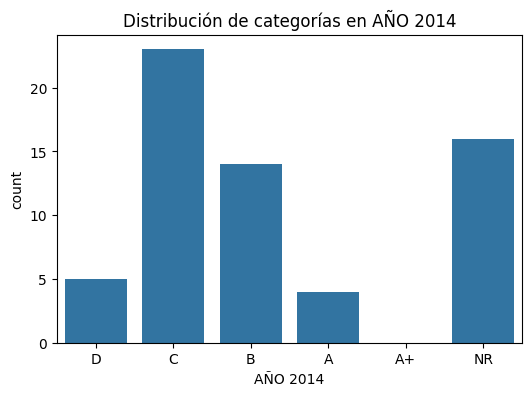

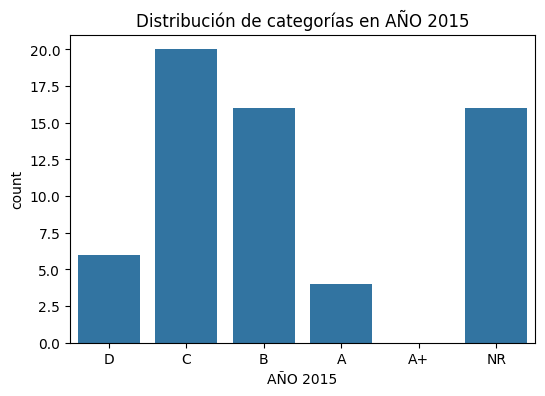

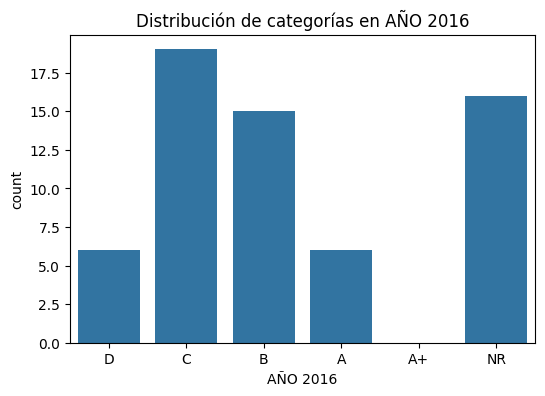

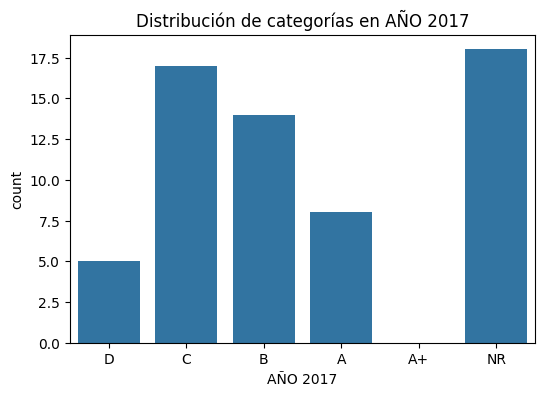

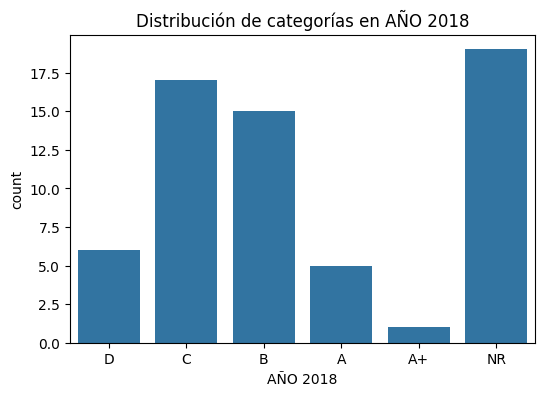

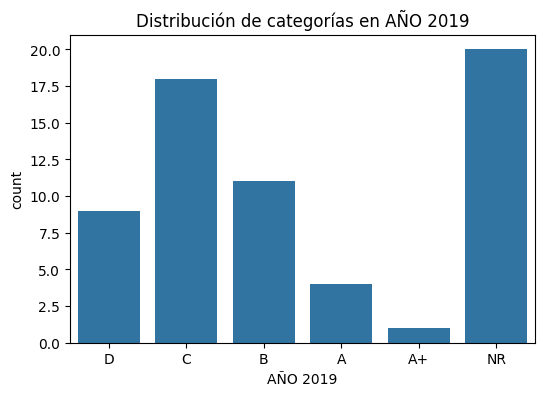

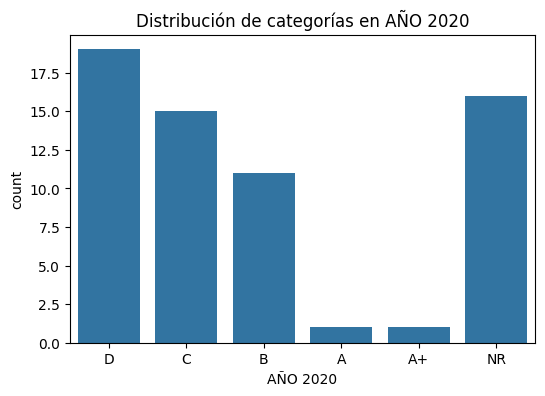

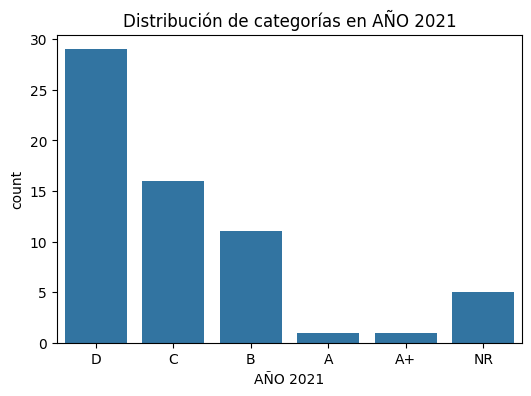

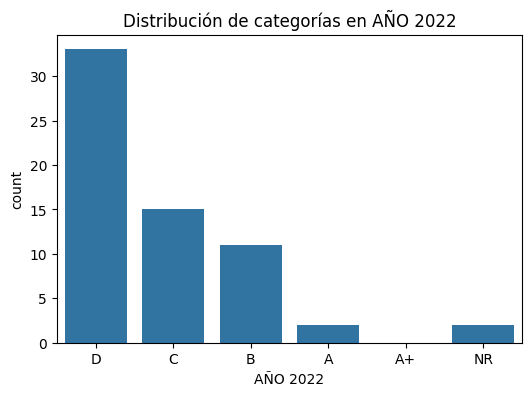

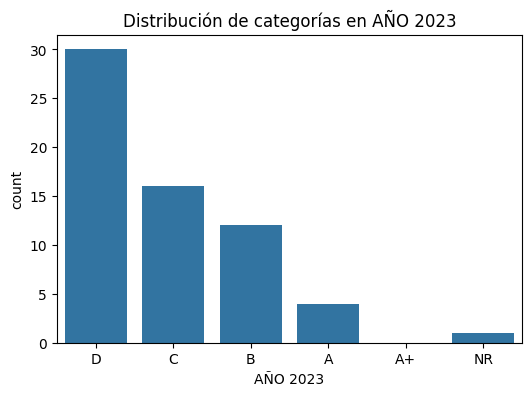

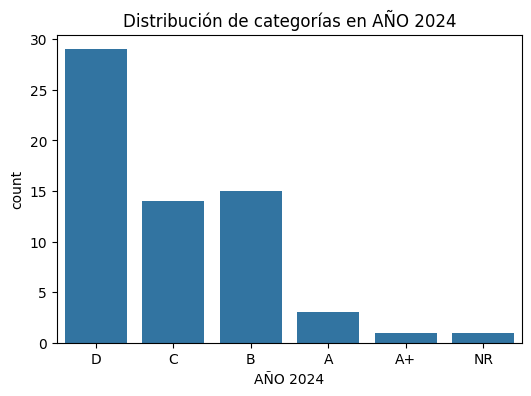

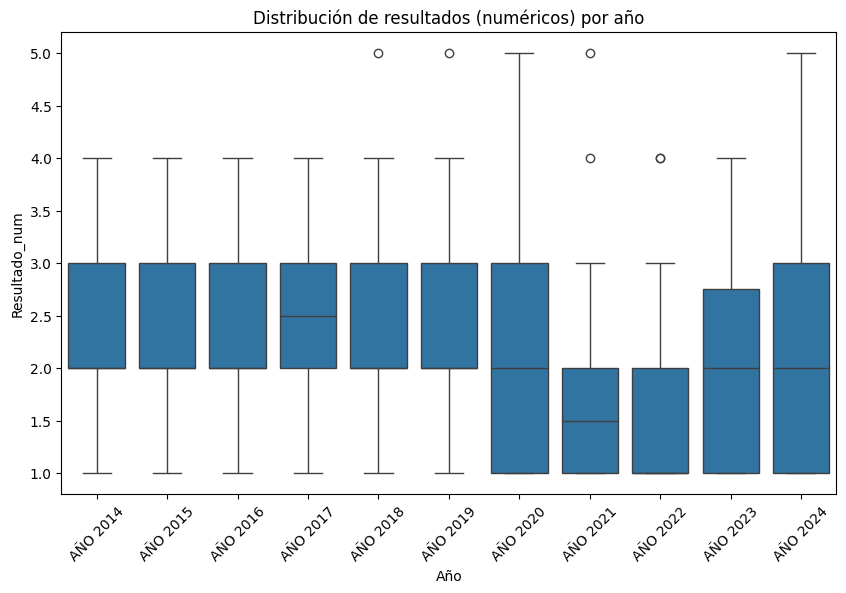

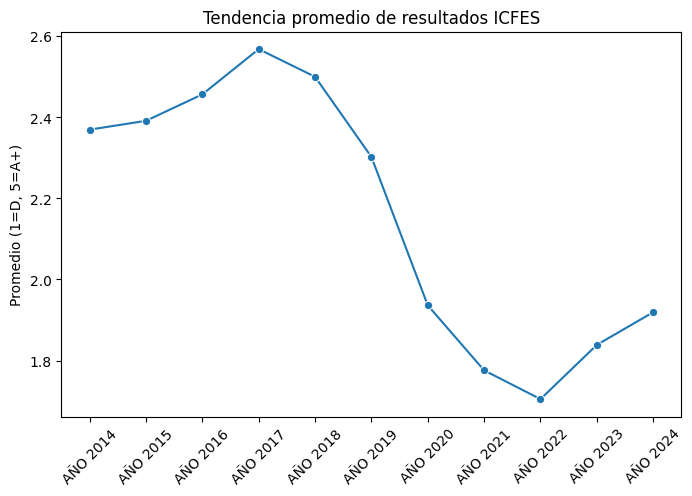


Promedio de resultados por municipio:
MUNICIPIO
Santa Rosa         3.156863
Santuario          2.705882
la Virginia        2.250000
La Celia           2.037037
Quinchía           2.010870
Belén de umbría    2.000000
Guática            1.872340
Marsella           1.725000
Apía               1.702703
Balboa             1.692308
Mistrató           1.272727
Pueblo Rico        1.250000
Name: Resultado_num, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Variable para cargar datos
df = pd.read_csv(r"C:\Users\JUAN\Downloads\Pruebas_ICFES_20250914.csv")

# Columnuas de los años
columnas_anios = [col for col in df.columns if "AÑO" in col.upper()]

#  Busqueda de categorias 
mapa_valores = {"D": 1, "C": 2, "B": 3, "A": 4, "A+": 5, "NR": None}
df_numerico = df.copy()
for col in columnas_anios:
    df_numerico[col] = df[col].map(mapa_valores)

# Estadísticas 
print("\nEstadísticas descriptivas por año:")
print(df_numerico[columnas_anios].describe().T)

# Distrubuccion de los resultados por año
for col in columnas_anios:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=["D","C","B","A","A+","NR"])
    plt.title(f"Distribución de categorías en {col}")
    plt.show()

#  Grafico para ver los resultados
df_long = df_numerico.melt(id_vars=["MUNICIPIO","INSTITUCION EDUCATIVA"], 
                           value_vars=columnas_anios,
                           var_name="Año", value_name="Resultado_num")
plt.figure(figsize=(10,6))
sns.boxplot(data=df_long, x="Año", y="Resultado_num")
plt.title("Distribución de resultados (numéricos) por año")
plt.xticks(rotation=45)
plt.show()

#  Las tendencias
tendencia = df_numerico[columnas_anios].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=columnas_anios, y=tendencia.values, marker="o")
plt.title("Tendencia promedio de resultados ICFES")
plt.xticks(rotation=45)
plt.ylabel("Promedio (1=D, 5=A+)")
plt.show()

# promedios de cada municipio
promedio_muni = df_long.groupby("MUNICIPIO")["Resultado_num"].mean().sort_values(ascending=False)
print("\nPromedio de resultados por municipio:")
print(promedio_muni)


## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

df = pd.read_csv(r"C:\Users\JUAN\Downloads\Pruebas_ICFES_20250914.csv")

mapa = {"D": 1, "C": 2, "B": 3, "A": 4, "A+": 5, "NR": None}
df_num = df.copy()
for col in df.filter(like="AÑO"):
    df_num[col] = df[col].map(mapa)

X = df_num[[c for c in df_num.columns if "AÑO" in c and c != "AÑO 2024"]]
y = df_num["AÑO 2024"]

data = pd.concat([X, y], axis=1).dropna()
X, y = data.drop(columns="AÑO 2024"), data["AÑO 2024"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred_lin)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Resultados - Regresión Lineal:")
print("R²   :", r2)
print("RMSE :", rmse)


log_reg = LogisticRegression(max_iter=1000, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\nResultados - Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))


Resultados - Regresión Lineal:
R²   : 0.8676928886408015
RMSE : 0.3150084657900465

Resultados - Regresión Logística:
Accuracy: 0.375


c:\Users\JUAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [ ]:
# Implementa tu respuesta en esta celda}



### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022